In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [95]:
# Load dataset
file_path_2024 = 'data_latest/Most Streamed Spotify Songs 2024.csv'

In [96]:
# Read dataset
data_2024 = pd.read_csv(file_path_2024, encoding='ISO-8859-1')

In [97]:
# Display the first few rows of each dataset to understand their structure
print(data_2024.head())

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

<div style="background-color: #f9c2c2; padding: 10px; border-radius: 5px; font-size: 20px; color: #333;">
    <b>Working on Full Dataset</b>
</div>

In [98]:
# Convert 'Release Date' to datetime format
data_2024['Release Date'] = pd.to_datetime(data_2024['Release Date'])

# Extract month and year from 'Release Date'
data_2024['Release Month'] = data_2024['Release Date'].dt.month
data_2024['Release Year'] = data_2024['Release Date'].dt.year

In [99]:
# Convert 'All Time Rank' to numeric, coercing errors to NaN
data_2024['All Time Rank'] = pd.to_numeric(data_2024['All Time Rank'], errors='coerce')

# Drop rows with NaN values in 'All Time Rank'
data_2024 = data_2024.dropna(subset=['All Time Rank'])

# Analyze song rank and release date
release_analysis_2024 = data_2024.groupby(['Release Year', 'Release Month'])['All Time Rank'].mean().reset_index()

In [100]:
print(release_analysis_2024)

     Release Year  Release Month  All Time Rank
0            2010              1     852.500000
1            2011              1     662.000000
2            2011             10     964.000000
3            2011             11     550.000000
4            2012              1     734.000000
..            ...            ...            ...
114          2024              2     522.520000
115          2024              3     399.897436
116          2024              4     439.382979
117          2024              5     436.529412
118          2024              6     320.473684

[119 rows x 3 columns]


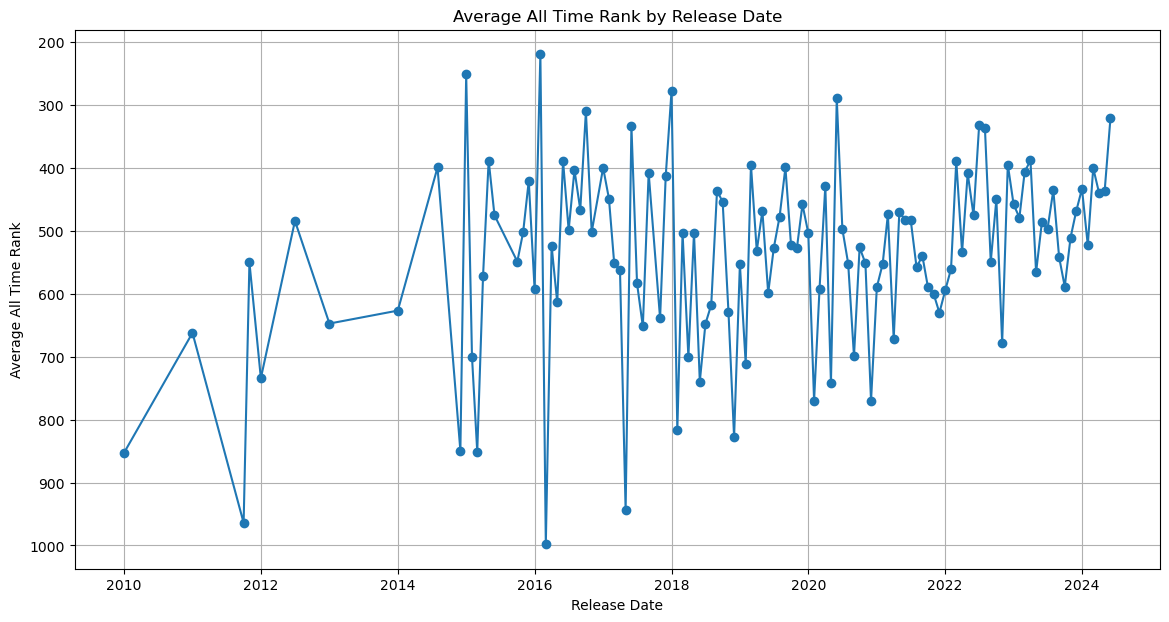

In [101]:
# Convert 'Release Month' to string and zero-pad it
release_analysis_2024['Release Month'] = release_analysis_2024['Release Month'].astype(int).astype(str).str.zfill(2)

# Combine year and month into a datetime format
release_analysis_2024['Release Date'] = pd.to_datetime(release_analysis_2024['Release Year'].astype(str) + '-' + release_analysis_2024['Release Month'])

# Drop rows with NaT values in 'Release Date' if any
release_analysis_2024 = release_analysis_2024.dropna(subset=['Release Date'])

# Sort the data by release date
release_analysis_2024 = release_analysis_2024.sort_values('Release Date')

# Plot data
plt.figure(figsize=(14, 7))
plt.plot(release_analysis_2024['Release Date'], release_analysis_2024['All Time Rank'], marker='o')

# Add titles and labels
plt.title('Average All Time Rank by Release Date')
plt.gca().invert_yaxis()  # Use gca() to get the current axes
plt.xlabel('Release Date')
plt.ylabel('Average All Time Rank')
plt.grid(True)

# Display the plot
plt.show()


Oldest Song Details:
Track Name: Love The Way You Lie
Release Date: 2010-01-01 00:00:00
Average All Time Rank: 784.0

Highest Charting Song Details:
Track Name: MILLION DOLLAR BABY
Release Date: 2024-04-01 00:00:00
Average All Time Rank: 1.0

Lowest Charting Song Details:
Track Name: Leï¿½
Release Date: 2022-12-01 00:00:00
Average All Time Rank: 999.0



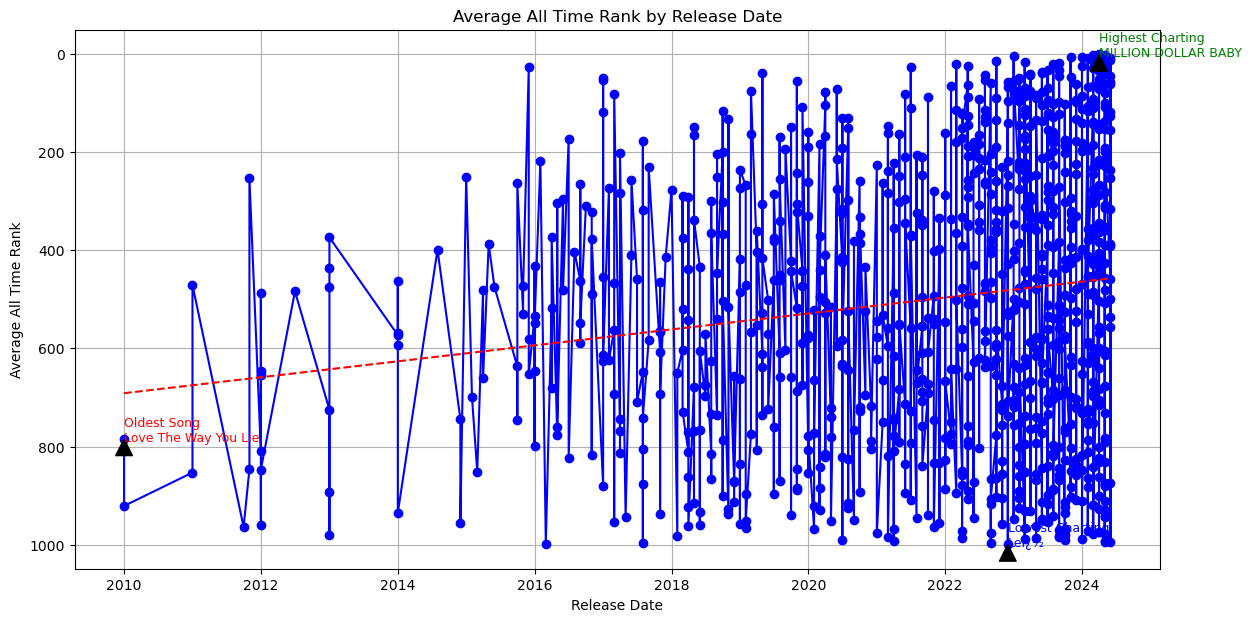

In [102]:
# Include track names in the analysis
release_analysis_2024 = data_2024.groupby(['Release Year', 'Release Month', 'Track'])[['All Time Rank']].mean().reset_index()

# Convert 'Release Month' to string and zero-pad it
release_analysis_2024['Release Month'] = release_analysis_2024['Release Month'].astype(int).astype(str).str.zfill(2)

# Combine year and month into a datetime format
release_analysis_2024['Release Date'] = pd.to_datetime(release_analysis_2024['Release Year'].astype(str) + '-' + release_analysis_2024['Release Month'])

# Drop rows with NaT values in 'Release Date' if any
release_analysis_2024 = release_analysis_2024.dropna(subset=['Release Date'])

# Sort the data by release date
release_analysis_2024 = release_analysis_2024.sort_values('Release Date')

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(release_analysis_2024['Release Date'], release_analysis_2024['All Time Rank'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Average All Time Rank by Release Date')
plt.gca().invert_yaxis()  # Use gca() to get the current axes
plt.xlabel('Release Date')
plt.ylabel('Average All Time Rank')
plt.grid(True)

# 1. Label and Mark the Oldest Song Still Charting
oldest_song = release_analysis_2024.loc[release_analysis_2024['Release Date'].idxmin()]
plt.annotate(f'Oldest Song\n{oldest_song["Track"]}', 
             xy=(oldest_song['Release Date'], oldest_song['All Time Rank']),
             xytext=(oldest_song['Release Date'], oldest_song['All Time Rank'] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, color='red')

# 2. Label and Mark the Highest (No. 1) and Lowest Charting Songs
highest_song = release_analysis_2024.loc[release_analysis_2024['All Time Rank'].idxmin()]
lowest_song = release_analysis_2024.loc[release_analysis_2024['All Time Rank'].idxmax()]

plt.annotate(f'Highest Charting\n{highest_song["Track"]}',
             xy=(highest_song['Release Date'], highest_song['All Time Rank']),
             xytext=(highest_song['Release Date'], highest_song['All Time Rank'] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, color='green')

plt.annotate(f'Lowest Charting\n{lowest_song["Track"]}',
             xy=(lowest_song['Release Date'], lowest_song['All Time Rank']),
             xytext=(lowest_song['Release Date'], lowest_song['All Time Rank'] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, color='blue')

# 3. Plot a Best Fit Line
# Compute the best fit line
z = np.polyfit(release_analysis_2024['Release Date'].map(pd.Timestamp.toordinal), release_analysis_2024['All Time Rank'], 1)
p = np.poly1d(z)
plt.plot(release_analysis_2024['Release Date'], p(release_analysis_2024['Release Date'].map(pd.Timestamp.toordinal)), linestyle='--', color='r')

# 4. For all songs labeled, show rank and number of streams
print(f"Oldest Song Details:\nTrack Name: {oldest_song['Track']}\nRelease Date: {oldest_song['Release Date']}\nAverage All Time Rank: {oldest_song['All Time Rank']}\n")
print(f"Highest Charting Song Details:\nTrack Name: {highest_song['Track']}\nRelease Date: {highest_song['Release Date']}\nAverage All Time Rank: {highest_song['All Time Rank']}\n")
print(f"Lowest Charting Song Details:\nTrack Name: {lowest_song['Track']}\nRelease Date: {lowest_song['Release Date']}\nAverage All Time Rank: {lowest_song['All Time Rank']}\n")

# Display the plot
plt.show()


<div style="background-color: #c2f9c2; padding: 10px; border-radius: 5px; font-size: 20px; color: #333;">
    <b>Working on Spotify Top 100</b>
</div>

In [103]:
# Filter to keep only the top 100 ranks
data_top_2024 = data_2024[data_2024['All Time Rank'] <= 100]

# Analyze song rank and release date
release_analysis_top_2024 = data_top_2024.groupby(['Release Year', 'Release Month'])['All Time Rank'].mean().reset_index()

print(release_analysis_top_2024)

    Release Year  Release Month  All Time Rank
0           2015             12      28.000000
1           2017              1      52.000000
2           2017              3      81.000000
3           2019              3      75.000000
4           2019              5      40.000000
5           2019             11      56.000000
6           2020              4      77.000000
7           2020              6      71.000000
8           2021              6      82.000000
9           2021              7      27.000000
10          2021             10      88.000000
11          2022              2      66.000000
12          2022              3      20.000000
13          2022              5      59.666667
14          2022              7      92.000000
15          2022              8      48.000000
16          2022              9      60.000000
17          2022             10      53.000000
18          2022             12      74.000000
19          2023              1      53.750000
20          2

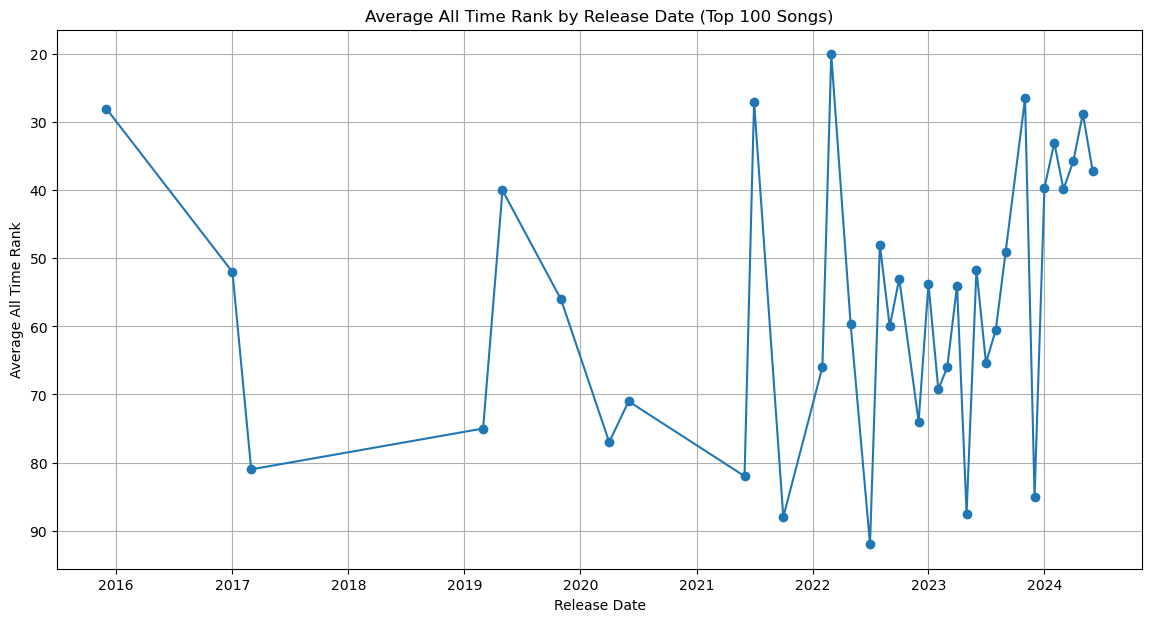

In [104]:
# Convert 'Release Month' to string and zero-pad it
release_analysis_top_2024 ['Release Month'] = release_analysis_top_2024 ['Release Month'].astype(int).astype(str).str.zfill(2)

# Combine year and month into a datetime format
release_analysis_top_2024['Release Date'] = pd.to_datetime(release_analysis_top_2024['Release Year'].astype(str) + '-' + release_analysis_top_2024['Release Month'])

# Drop rows with NaT values in 'Release Date' if any
release_analysis_top_2024 = release_analysis_top_2024.dropna(subset=['Release Date'])

# Sort the data by release date
release_analysis_top_2024 = release_analysis_top_2024.sort_values('Release Date')

# Plot data
plt.figure(figsize=(14, 7))
plt.plot(release_analysis_top_2024['Release Date'], release_analysis_top_2024['All Time Rank'], marker='o')

# Add titles and labels
plt.title('Average All Time Rank by Release Date (Top 100 Songs)')
plt.gca().invert_yaxis()  # Use gca() to get the current axes
plt.xlabel('Release Date')
plt.ylabel('Average All Time Rank')
plt.grid(True)

# Display the plot
plt.show()



Oldest Song Still Charting Details:
Track Name: Baby Shark
Artist: Pinkfong
Release Date: 2015-12-01 00:00:00
Average All Time Rank: 28.0

Highest Charting Song Details:
Track Name: MILLION DOLLAR BABY
Artist: Tommy Richman
Release Date: 2024-04-01 00:00:00
Average All Time Rank: 1.0

Lowest Charting Song Details:
Track Name: Prada
Artist: cassï¿
Release Date: 2023-08-01 00:00:00
Average All Time Rank: 100.0



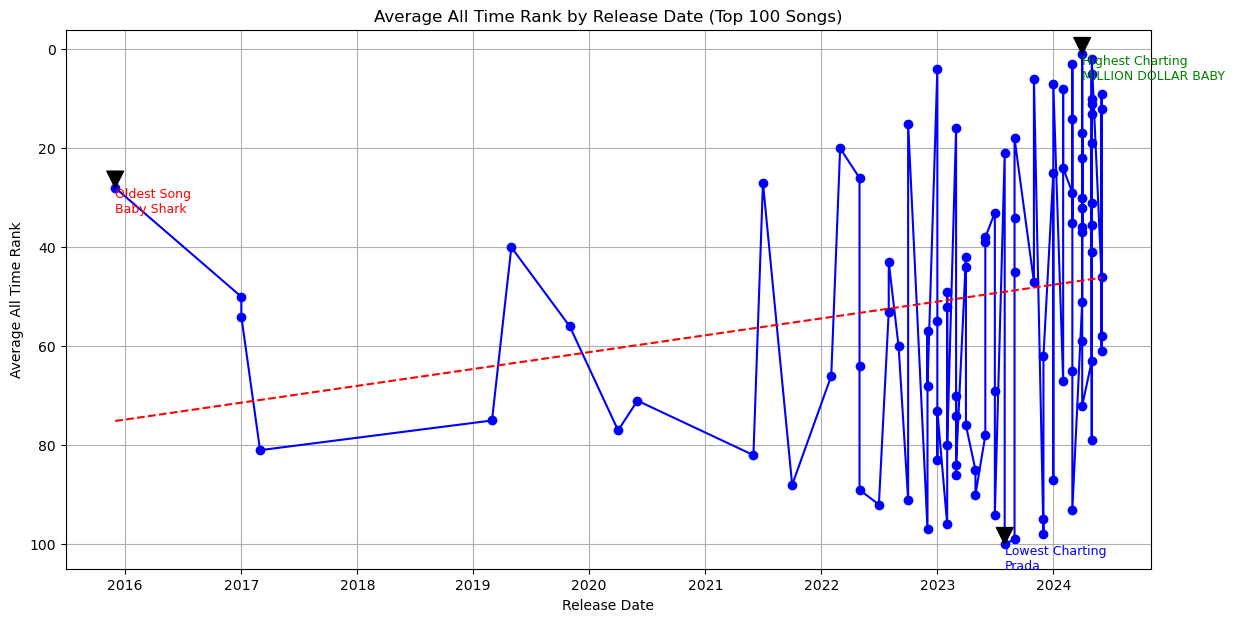

In [105]:
# Include track names in the analysis
release_analysis_top_2024 = data_top_2024.groupby(['Release Year', 'Release Month', 'Track', 'Artist'])[['All Time Rank']].mean().reset_index()

# Convert 'Release Month' to string and zero-pad it
release_analysis_top_2024['Release Month'] = release_analysis_top_2024['Release Month'].astype(int).astype(str).str.zfill(2)

# Combine year and month into a datetime format
release_analysis_top_2024['Release Date'] = pd.to_datetime(release_analysis_top_2024['Release Year'].astype(str) + '-' + release_analysis_top_2024['Release Month'])

# Drop rows with NaT values in 'Release Date' if any
release_analysis_top_2024 = release_analysis_top_2024.dropna(subset=['Release Date'])

# Sort the data by release date
release_analysis_top_2024 = release_analysis_top_2024.sort_values('Release Date')

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(release_analysis_top_2024['Release Date'], release_analysis_top_2024['All Time Rank'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Average All Time Rank by Release Date (Top 100 Songs)')
plt.gca().invert_yaxis()  # Use gca() to get the current axes
plt.xlabel('Release Date')
plt.ylabel('Average All Time Rank')
plt.grid(True)

# 1. Label and Mark the Oldest Song Still Charting
oldest_song = release_analysis_top_2024.loc[release_analysis_top_2024['Release Date'].idxmin()]
plt.annotate(f'Oldest Song\n{oldest_song["Track"]}', 
             xy=(oldest_song['Release Date'], oldest_song['All Time Rank']),
             xytext=(oldest_song['Release Date'], oldest_song['All Time Rank'] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, color='red')

# 2. Label and Mark the Highest (No. 1) and Lowest Charting Songs
highest_song = release_analysis_top_2024.loc[release_analysis_top_2024['All Time Rank'].idxmin()]
lowest_song = release_analysis_top_2024.loc[release_analysis_top_2024['All Time Rank'].idxmax()]

plt.annotate(f'Highest Charting\n{highest_song["Track"]}',
             xy=(highest_song['Release Date'], highest_song['All Time Rank']),
             xytext=(highest_song['Release Date'], highest_song['All Time Rank'] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, color='green')

plt.annotate(f'Lowest Charting\n{lowest_song["Track"]}',
             xy=(lowest_song['Release Date'], lowest_song['All Time Rank']),
             xytext=(lowest_song['Release Date'], lowest_song['All Time Rank'] + 5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, color='blue')

# 3. Plot a Best Fit Line
# Compute the best fit line
z = np.polyfit(release_analysis_top_2024['Release Date'].map(pd.Timestamp.toordinal), release_analysis_top_2024['All Time Rank'], 1)
p = np.poly1d(z)
plt.plot(release_analysis_top_2024['Release Date'], p(release_analysis_top_2024['Release Date'].map(pd.Timestamp.toordinal)), linestyle='--', color='r')

# 4. For all songs labeled, show rank and number of streams
print(f"Oldest Song Still Charting Details:\nTrack Name: {oldest_song['Track']}\nArtist: {oldest_song['Artist']}\nRelease Date: {oldest_song['Release Date']}\nAverage All Time Rank: {oldest_song['All Time Rank']}\n")
print(f"Highest Charting Song Details:\nTrack Name: {highest_song['Track']}\nArtist: {highest_song['Artist']}\nRelease Date: {highest_song['Release Date']}\nAverage All Time Rank: {highest_song['All Time Rank']}\n")
print(f"Lowest Charting Song Details:\nTrack Name: {lowest_song['Track']}\nArtist: {lowest_song['Artist']}\nRelease Date: {lowest_song['Release Date']}\nAverage All Time Rank: {lowest_song['All Time Rank']}\n")

# Display the plot
plt.show()

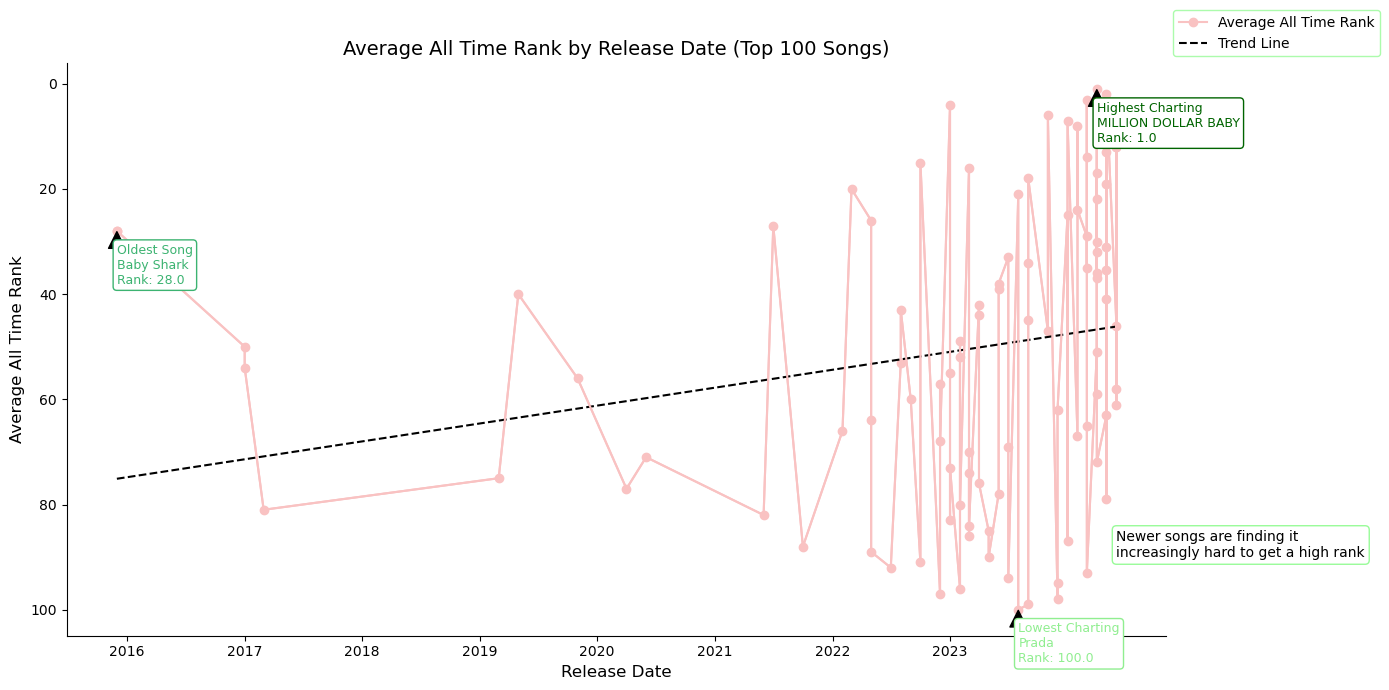

In [111]:
# Plot the data with enhancements
plt.figure(figsize=(14, 7))

# Plot the main line
plt.plot(release_analysis_top_2024['Release Date'], release_analysis_top_2024['All Time Rank'], marker='o', linestyle='-', color='#f9c2c2', label='Average All Time Rank')

# Invert y-axis to show ranks from 1 (top) downwards
plt.gca().invert_yaxis()

# Add titles and labels
plt.title('Average All Time Rank by Release Date (Top 100 Songs)', fontsize=14)
plt.xlabel('Release Date', fontsize=12)
plt.ylabel('Average All Time Rank', fontsize=12)

# Label and Mark the Oldest Song Still Charting
plt.annotate(f'Oldest Song\n{oldest_song["Track"]}\nRank: {oldest_song["All Time Rank"]}',
             xy=(oldest_song['Release Date'], oldest_song['All Time Rank']),
             xytext=(oldest_song['Release Date'], oldest_song['All Time Rank'] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, color='mediumseagreen', bbox=dict(boxstyle="round,pad=0.3", edgecolor="mediumseagreen", facecolor="white"))

# Label and Mark the Highest and Lowest Charting Songs
plt.annotate(f'Highest Charting\n{highest_song["Track"]}\nRank: {highest_song["All Time Rank"]}',
             xy=(highest_song['Release Date'], highest_song['All Time Rank']),
             xytext=(highest_song['Release Date'], highest_song['All Time Rank'] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, color='darkgreen', bbox=dict(boxstyle="round,pad=0.3", edgecolor="darkgreen", facecolor="white"))

plt.annotate(f'Lowest Charting\n{lowest_song["Track"]}\nRank: {lowest_song["All Time Rank"]}',
             xy=(lowest_song['Release Date'], lowest_song['All Time Rank']),
             xytext=(lowest_song['Release Date'], lowest_song['All Time Rank'] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=9, color='lightgreen', bbox=dict(boxstyle="round,pad=0.3", edgecolor="lightgreen", facecolor="white"))



# Compute the best fit line
z = np.polyfit(release_analysis_top_2024['Release Date'].map(pd.Timestamp.toordinal), release_analysis_top_2024['All Time Rank'], 1)
p = np.poly1d(z)
plt.plot(release_analysis_top_2024['Release Date'], p(release_analysis_top_2024['Release Date'].map(pd.Timestamp.toordinal)), linestyle='--', color='black', label='Trend Line')

# Add a concise annotation about new songs
plt.annotate('Newer songs are finding it\nincreasingly hard to get a high rank', 
             xy=(release_analysis_top_2024['Release Date'].iloc[-1], release_analysis_top_2024['All Time Rank'].iloc[-1]),
             xytext=(release_analysis_top_2024['Release Date'].iloc[-1], release_analysis_top_2024['All Time Rank'].max() - 10),
             fontsize=10, color='black', bbox=dict(boxstyle="round,pad=0.3", edgecolor="palegreen", facecolor="white"))

# Remove gridlines and set black axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')
plt.grid(False)

# De-cluster plot by marking only key points
markers_on = [0, len(release_analysis_top_2024) - 1]
plt.plot(release_analysis_top_2024['Release Date'], release_analysis_top_2024['All Time Rank'], marker='o', linestyle='-', color='#f9c2c2', markevery=markers_on) 

# Add legend next to relevant points
plt.legend(loc='lower left', bbox_to_anchor=(1,1), fontsize=10, edgecolor='palegreen', facecolor='white')

# Display the plot with increased open space
plt.tight_layout()
plt.show()


<div style="background-color: #ffffff; padding: 20px; border-radius: 10px; color: #333;">
    <h2>Color Palette for Use</h2>  
    <p><b>Background:</b> <span style="background-color: #fffbf2; padding: 2px 6px; border-radius: 3px;">#fffbf2 (Off-white)</span></p>
    <p><b>Graph Colors:</b></p>
    <ul>
        <li>#D7DBDC (Iron Grey)<span style="background-color: #D7DBDC; padding: 2px 6px; border-radius: 3px;"></span></li>
        <li>#DA5353 (Roman Red)<span style="background-color: #DA5353; padding: 2px 6px; border-radius: 3px;"></span></li>
        <li>#41504F (Cape Cod Near-Black)<span style="background-color: #41504F; padding: 2px 6px; border-radius: 3px;"></span></li>
        <li>#F1BB4C (Ronchi Mustard)<span style="background-color: #F1BB4C; padding: 2px 6px; border-radius: 3px;"></span></li>
    </ul>
    <p>This palette was selected to create a balanced and visually appealing design for charts and graphs. The off-white background provides a neutral canvas that highlights the graph colors effectively. The chosen graph colors offer a combination of muted and vibrant tones, ensuring clarity and contrast.</p>
</div>


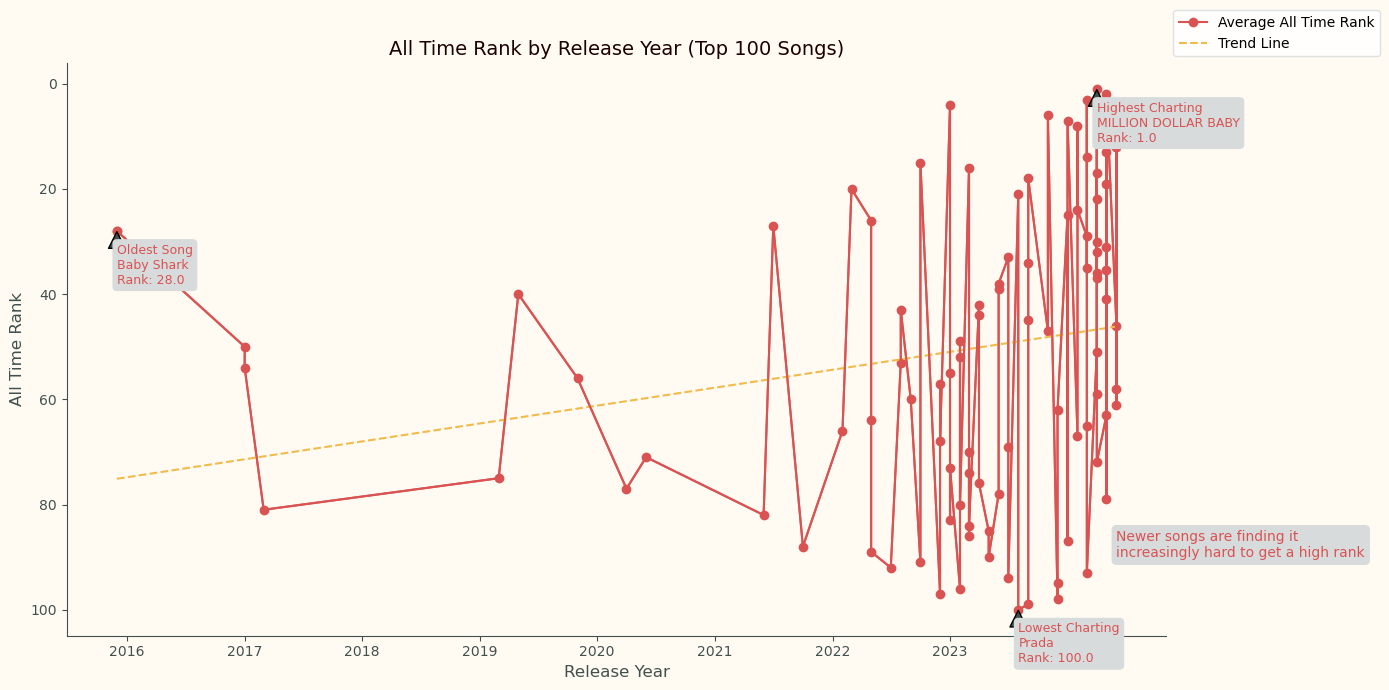

In [118]:
# Set background color
plt.figure(figsize=(14, 7), facecolor='#fffbf2')

# Plot the main line
plt.plot(release_analysis_top_2024['Release Date'], release_analysis_top_2024['All Time Rank'], marker='o', linestyle='-', color='#DA5353', label='Average All Time Rank')

# Invert y-axis to show ranks from 1 (top) downwards
plt.gca().invert_yaxis()

# Add titles and labels
plt.title('All Time Rank by Release Year (Top 100 Songs)', fontsize=14, color='#1c0101')
plt.xlabel('Release Year', fontsize=12, color='#1c0101')
plt.ylabel('All Time Rank', fontsize=12, color='#1c0101')

# Label and Mark the Oldest Song Still Charting
plt.annotate(f'Oldest Song\n{oldest_song["Track"]}\nRank: {oldest_song["All Time Rank"]}',
             xy=(oldest_song['Release Date'], oldest_song['All Time Rank']),
             xytext=(oldest_song['Release Date'], oldest_song['All Time Rank'] + 10),
             arrowprops=dict(facecolor='#41504F', shrink=0.05),
             fontsize=9, color='#DA5353', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#D7DBDC", facecolor="#D7DBDC"))

# Label and Mark the Highest and Lowest Charting Songs
plt.annotate(f'Highest Charting\n{highest_song["Track"]}\nRank: {highest_song["All Time Rank"]}',
             xy=(highest_song['Release Date'], highest_song['All Time Rank']),
             xytext=(highest_song['Release Date'], highest_song['All Time Rank'] + 10),
             arrowprops=dict(facecolor='#41504F', shrink=0.05),
             fontsize=9, color='#DA5353', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#D7DBDC", facecolor="#D7DBDC"))

plt.annotate(f'Lowest Charting\n{lowest_song["Track"]}\nRank: {lowest_song["All Time Rank"]}',
             xy=(lowest_song['Release Date'], lowest_song['All Time Rank']),
             xytext=(lowest_song['Release Date'], lowest_song['All Time Rank'] + 10),
             arrowprops=dict(facecolor='#41504F', shrink=0.05),
             fontsize=9, color='#DA5353', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#D7DBDC", facecolor="#D7DBDC"))

# Compute the best fit line
z = np.polyfit(release_analysis_top_2024['Release Date'].map(pd.Timestamp.toordinal), release_analysis_top_2024['All Time Rank'], 1)
p = np.poly1d(z)
plt.plot(release_analysis_top_2024['Release Date'], p(release_analysis_top_2024['Release Date'].map(pd.Timestamp.toordinal)), linestyle='--', color='#F1BB4C', label='Trend Line')

# Add a concise annotation about new songs
plt.annotate('Newer songs are finding it\nincreasingly hard to get a high rank', 
             xy=(release_analysis_top_2024['Release Date'].iloc[-1], release_analysis_top_2024['All Time Rank'].iloc[-1]),
             xytext=(release_analysis_top_2024['Release Date'].iloc[-1], release_analysis_top_2024['All Time Rank'].max() - 10),
             fontsize=10, color='#DA5353', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#D7DBDC", facecolor="#D7DBDC"))

# Remove gridlines and set black axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#41504F')
plt.gca().spines['left'].set_color('#41504F')
plt.gca().xaxis.label.set_color('#41504F')
plt.gca().yaxis.label.set_color('#41504F')
plt.gca().tick_params(axis='x', colors='#41504F')
plt.gca().tick_params(axis='y', colors='#41504F')
plt.grid(False)

# De-cluster plot by marking only key points
markers_on = [0, len(release_analysis_top_2024) - 1]
plt.plot(release_analysis_top_2024['Release Date'], release_analysis_top_2024['All Time Rank'], marker='o', linestyle='-', color='#DA5353', markevery=markers_on) 

# Add legend next to relevant points
plt.legend(loc='lower left', bbox_to_anchor=(1,1), fontsize=10, edgecolor='#D7DBDC', facecolor='white')

# Set background color of the plot area
plt.gca().set_facecolor('#fffbf2')

# Display the plot with increased open space
plt.tight_layout()
plt.show()

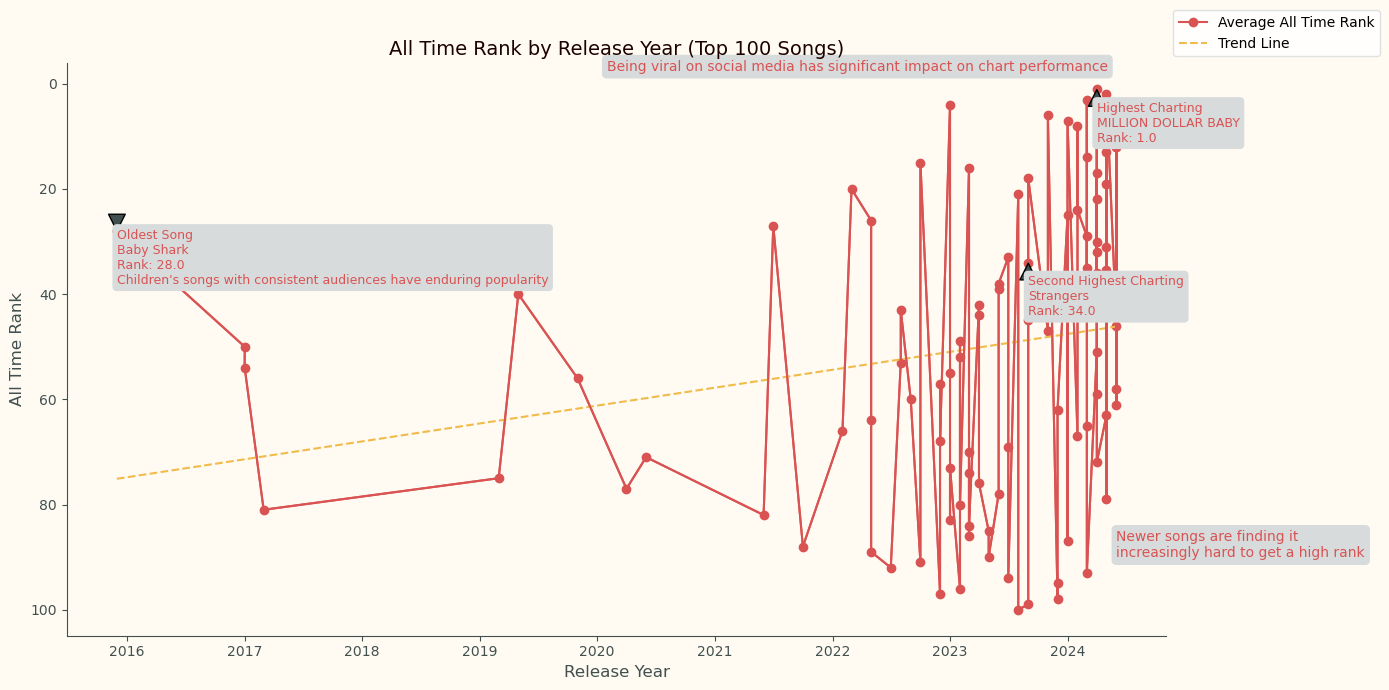

In [128]:
# Extracting the necessary data
release_dates = data_sorted['Release Date']
all_time_ranks = data_sorted['All Time Rank']
track_names = data_sorted['Track']

# Identify the highest and second highest charting songs
highest_song = data_sorted.iloc[0]
second_highest_song = data_sorted.iloc[1]
oldest_song = data_sorted.iloc[data_sorted['Release Date'].idxmin()]

# Plotting the data
plt.figure(figsize=(14, 7), facecolor='#fffbf2')
plt.plot(release_dates, all_time_ranks, marker='o', linestyle='-', color='#DA5353', label='Average All Time Rank')
plt.gca().invert_yaxis()

# Adding titles and labels
plt.title('All Time Rank by Release Year (Top 100 Songs)', fontsize=14, color='#1c0101')
plt.xlabel('Release Year', fontsize=12, color='#1c0101')
plt.ylabel('All Time Rank', fontsize=12, color='#1c0101')

# Labeling and marking the oldest song still charting
plt.annotate(f'Oldest Song\n{oldest_song["Track"]}\nRank: {oldest_song["All Time Rank"]}\nChildren\'s songs with consistent audiences have enduring popularity',
             xy=(oldest_song['Release Date'], oldest_song['All Time Rank']),
             xytext=(oldest_song['Release Date'], oldest_song['All Time Rank'] + 10),
             arrowprops=dict(facecolor='#41504F', shrink=0.05),
             fontsize=9, color='#DA5353', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#D7DBDC", facecolor="#D7DBDC"))

# Labeling and marking the highest and second highest charting songs
plt.annotate(f'Highest Charting\n{highest_song["Track"]}\nRank: {highest_song["All Time Rank"]}',
             xy=(highest_song['Release Date'], highest_song['All Time Rank']),
             xytext=(highest_song['Release Date'], highest_song['All Time Rank'] + 10),
             arrowprops=dict(facecolor='#41504F', shrink=0.05),
             fontsize=9, color='#DA5353', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#D7DBDC", facecolor="#D7DBDC"))

plt.annotate(f'Second Highest Charting\n{second_highest_song["Track"]}\nRank: {second_highest_song["All Time Rank"]}',
             xy=(second_highest_song['Release Date'], second_highest_song['All Time Rank']),
             xytext=(second_highest_song['Release Date'], second_highest_song['All Time Rank'] + 10),
             arrowprops=dict(facecolor='#41504F', shrink=0.05),
             fontsize=9, color='#DA5353', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#D7DBDC", facecolor="#D7DBDC"))

# Using average date for the social media impact annotation
average_date = oldest_song['Release Date'] + (highest_song['Release Date'] - oldest_song['Release Date']) / 2
average_rank = (highest_song['All Time Rank'] + second_highest_song['All Time Rank']) / 2

plt.annotate('Being viral on social media has significant impact on chart performance', 
             xy=(average_date, average_rank),
             xytext=(average_date, average_rank - 20),
             fontsize=10, color='#DA5353', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#D7DBDC", facecolor="#D7DBDC"))

# Compute the best fit line
z = np.polyfit(release_dates.map(pd.Timestamp.toordinal), all_time_ranks, 1)
p = np.poly1d(z)
plt.plot(release_dates, p(release_dates.map(pd.Timestamp.toordinal)), linestyle='--', color='#F1BB4C', label='Trend Line')

# Adding a concise annotation about new songs
plt.annotate('Newer songs are finding it\nincreasingly hard to get a high rank', 
             xy=(release_dates.iloc[-1], all_time_ranks.iloc[-1]),
             xytext=(release_dates.iloc[-1], all_time_ranks.max() - 10),
             fontsize=10, color='#DA5353', bbox=dict(boxstyle="round,pad=0.3", edgecolor="#D7DBDC", facecolor="#D7DBDC"))

# Removing gridlines and setting black axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('#41504F')
plt.gca().spines['left'].set_color('#41504F')
plt.gca().xaxis.label.set_color('#41504F')
plt.gca().yaxis.label.set_color('#41504F')
plt.gca().tick_params(axis='x', colors='#41504F')
plt.gca().tick_params(axis='y', colors='#41504F')
plt.grid(False)

# De-clustering plot by marking only key points
markers_on = [0, len(data_sorted) - 1]
plt.plot(release_dates, all_time_ranks, marker='o', linestyle='-', color='#DA5353', markevery=markers_on) 

# Adding legend next to relevant points
plt.legend(loc='lower left', bbox_to_anchor=(1,1), fontsize=10, edgecolor='#D7DBDC', facecolor='white')

# Setting background color of the plot area
plt.gca().set_facecolor('#fffbf2')

# Displaying the plot with increased open space
plt.tight_layout()
plt.show()

<div style="background-color: #e0b3e0; padding: 20px; border-radius: 10px; color: #4a0036;">
    <h2>Analysis of Chart Performance</h2>
</div>


<div style="background-color: #e0b3e0; padding: 20px; border-radius: 10px; color: #4a0036;">
    <h3>Oldest Song Still Charting: "Baby Shark" by Pinkfong</h3>
    <p><b>Release Date:</b> December 1, 2015</p>
    <p><b>Average All Time Rank:</b> 28.0</p>
    <p><b>Explanation:</b><br>
    "Baby Shark" is a viral children's song that has gained immense popularity worldwide. Its simple and repetitive lyrics and catchy melody make it a favorite among young children. The song's enduring popularity is reflected in its high average rank despite being one of the oldest songs still charting. The YouTube video of "Baby Shark" has over 14 billion views, making it the most-viewed video on the platform as of March 2024.</p>
</div>


<div style="background-color: #e0b3e0; padding: 20px; border-radius: 10px; color: #4a0036;">
    <h3>Highest Charting Song: "MILLION DOLLAR BABY" by Tommy Richman</h3>
    <p><b>Release Date:</b> April 1, 2024</p>
    <p><b>Average All Time Rank:</b> 1.0</p>
    <p><b>Explanation:</b><br>
    "MILLION DOLLAR BABY" is a recent release that has quickly climbed to the top of the charts. The song gained massive traction on social media platforms like TikTok, where it became the soundtrack for various trends and challenges. Tommy Richman's active engagement on social media, along with the song's catchy and unique sound, contributed to its explosive popularity. The song's ability to connect with a wide audience and become a trend on TikTok played a significant role in its success.</p>
</div>


<div style="background-color: #e0b3e0; padding: 20px; border-radius: 10px; color: #4a0036;">
    <h3>Observations from the Chart</h3>
    <p>The trend line in the chart suggests a slight increase in the average all-time rank over recent years. This could indicate that newer songs are finding it more challenging to maintain top positions over time, possibly due to increased competition and the rapid consumption of music facilitated by streaming platforms. The increased availability of older songs may also play a part.<br>
    Songs that gain virality on social media platforms like TikTok tend to have a significant impact on their chart performance. This is evident from the success of "MILLION DOLLAR BABY."<br>
    Children's songs like "Baby Shark" have enduring popularity, as they appeal to a specific and consistent audience that continually refreshes with new listeners (young children).</p>
</div>

<div style="background-color: #e0b3e0; padding: 20px; border-radius: 10px; color: #4a0036;">
    <h3>Conclusion</h3>
    <p>The chart performance of these songs highlights the diverse factors that contribute to a song's success, including virality, audience engagement, and the nature of the song's content. Social media trends, in particular, play a crucial role in propelling songs to the top of the charts. Additionally, songs with niche but consistent audiences, like children's songs, can maintain high positions over extended periods.</p>
</div>